\###### Welcome to your third assignment!

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry. We need you to upload the .ipynb-file and the exported .pdf of this notebook.

If you have any questions, ask them in either in the tutorials or in the "Mattermost" channel: https://mattermost.imp.fu-berlin.de/biorobotics/channels/ssl_ws_2324


In this assignment, we want you to explore Autoencoders.

# Slide Review

[Google Form](https://forms.gle/ZgL1p9g1T9GgtAkVA) for the slide review. Please take a minute to scroll over the slides again and improve your lecture.

Please make sure to only choose your top 5 slides per lecture!

# PapagAI

From the second week onwards we started the reflective study.
Register on the [PapagAI website](https://www.papag.ai) and write your first reflection about your impressions and challenges in the context of the lectures and tutorials you had this and previous week. The size of reflection can be anywhere bigger than 100 words. You can check out this [YouTube video](https://www.youtube.com/watch?v=QdmZHocZQBk&ab_channel=FernandoRamosL%C3%B3pez) with instructions on how to register, create a reflection and get an ai feedback.

Please note, that this task is an obligatory one for this course and make sure each of you does the reflection, not only one person per group.

#### Please state both names of your group members here:
Authors: Namrata De, Manasi Acharya

# Assignment 3: Autoencoder

This week's lecture introduced Autoencoders (AE), Denoising Autoencoders (DAE), and Masked Autoencoders (MAE). We want you to implement solutions for each approach in the following exercises. They will all use the MNIST images dataset, like the previous assignments. Here are the paper-links for you to read up on them:

AE - [Paper](https://www.cs.toronto.edu/~hinton/absps/science.pdf) <br>
DAE - [Paper](https://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf) <br>
MAE - [Paper](https://arxiv.org/pdf/2111.06377.pdf) <br>


## Ex. 3.1 Autoencoder for Compression

Build an Autoencoder with a compressed latent space. You should use Convolution for downscaling and Deconvolution for upscaling. **(RESULT)**

Train your model on MNIST images and compare at least 5 original and reconstructed images visually. **(RESULT)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from keras.models import Model
from keras.datasets import mnist


from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D


Epoch 1/10
469/469 [==============================] - 73s 141ms/step - loss: 0.2340 - val_loss: 0.1667
Epoch 2/10
469/469 [==============================] - 64s 137ms/step - loss: 0.1544 - val_loss: 0.1447
Epoch 3/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1415 - val_loss: 0.1366
Epoch 4/10
469/469 [==============================] - 65s 139ms/step - loss: 0.1348 - val_loss: 0.1311
Epoch 5/10
469/469 [==============================] - 67s 143ms/step - loss: 0.1301 - val_loss: 0.1279
Epoch 6/10
469/469 [==============================] - 68s 144ms/step - loss: 0.1267 - val_loss: 0.1241
Epoch 7/10
469/469 [==============================] - 65s 138ms/step - loss: 0.1241 - val_loss: 0.1220
Epoch 8/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1221 - val_loss: 0.1202
Epoch 9/10
469/469 [==============================] - 64s 135ms/step - loss: 0.1204 - val_loss: 0.1186
Epoch 10/10
313/313 [==============================] - 9s 28ms/step


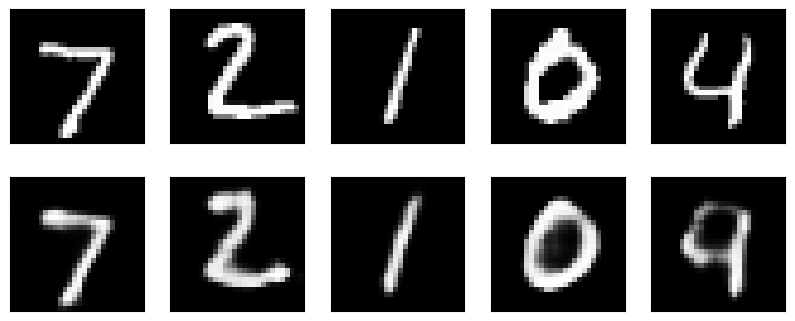

In [2]:

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to (samples, height, width, channels)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Model evaluation
decoded_imgs = autoencoder.predict(x_test)

# original and reconstructed images
n = 5  # Number of images
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Ex. 3.2 Denoising AE

As a second exercise, we want you to build a denoising autoencoder (DAE). The DAE may have more latent dimensions than input dimensions. The training on noisy inputs prevents it from learning the identity function. Therefore, using a bigger latent space is possible, too. Make sure to use the original inputs for computing the loss.

- Build a DAE with more hidden dimensions than input dimensions. **(RESULT)** Usually a higher channel count provides a bigger latent space, while the spatial dimentsion are reduced.

- Train it on MNIST samples that have two different flavours of noise applied to them. Show at least 5 denoised samples with your model and compare them visually to the respective input  **(RESULT)**

- Compare two different loss functions and their effect on the model's reconstruction performance. **(RESULT)**

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.0459 - val_loss: 0.0270
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0234 - val_loss: 0.0202
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0192 - val_loss: 0.0179
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0175 - val_loss: 0.0168
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0166 - val_loss: 0.0163
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0156 - val_loss: 0.0155
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0150 - val_loss: 0.0152
Epoch 10/10
313/313 [==============================] - 1s 4ms/step


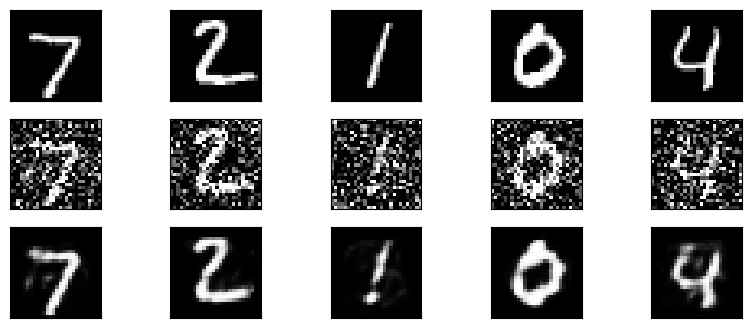

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mean_squared_error, binary_crossentropy
from keras.optimizers import Adam

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Adding noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Flatten the images for Dense layers
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

# DAE architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # Bigger latent space
decoded = Dense(784, activation='sigmoid')(encoded)

dae = Model(input_img, decoded)

# loss functions (mean squared error and binary crossentropy)
loss_function_1 = mean_squared_error
loss_function_2 = binary_crossentropy

# Compile the mode
dae.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function_1)

# Train DAE
dae.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Model evaluation and visualization
decoded_imgs = dae.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 5  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Ex. 3.3 Masked AE (BONUS)

Implement a Masked Autoencoder (MAE) model for image data, i.e. the MNIST data. Can you build representations using fully connected or convolutional layers? You don't have to implement a Transformer as an Encoder or Decoder for this exercise. **(RESULT)**

Make sure to utilize image-patching. The masking token can be fixed and does not have to be learnable by the Decoder.

Check the performance of your Autoencoder on a the finetuning classification task on the MNIST test dataset. Report on the accuracy using your learned representations. **(RESULT)**

Bonus question: What can you do to account for information leekage in the MAE that uses Convolutional Layers?

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.feature_extraction.image import extract_patches_2d

# Load MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()
train_images = train_images[:5000] / 255.0  # Use a subset of the dataset
test_images = test_images[:1000] / 255.0  # Use a subset of the dataset

# parameters for image patching
patch_size = (4, 4)

# Extract image patches
def extract_patches(images):
    patches = []
    for image in images:
        image_patches = extract_patches_2d(image, patch_size, max_patches=None, random_state=None)
        patches.extend(image_patches)
    return np.array(patches)

train_patches = extract_patches(train_images)
test_patches = extract_patches(test_images)

# input shape
input_shape = patch_size + (1,)

# encoder
input_patch = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_patch)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

#  decoder
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder model
autoencoder = Model(input_patch, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(train_patches, train_patches, epochs=5, batch_size=128, validation_data=(test_patches, test_patches))


Epoch 1/5
24415/24415 [==============================] - 432s 18ms/step - loss: 2.5874e-04 - val_loss: 4.6732e-06
Epoch 2/5
24415/24415 [==============================] - 334s 14ms/step - loss: 3.6968e-06 - val_loss: 1.7918e-06
Epoch 3/5
24415/24415 [==============================] - 337s 14ms/step - loss: 1.8847e-06 - val_loss: 8.0043e-07
Epoch 4/5
24415/24415 [==============================] - 334s 14ms/step - loss: 1.2750e-06 - val_loss: 1.4930e-06
Epoch 5/5
24415/24415 [==============================] - 335s 14ms/step - loss: 1.0145e-06 - val_loss: 4.9467e-07


In [8]:
predicted_test_patches = autoencoder.predict(test_patches)

19532/19532 [==============================] - 60s 3ms/step


In [23]:
# Get the shape of the test patches
num_patches, patch_height, patch_width, _ = predicted_test_patches.shape

# Reshape the predicted patches to match the original size
predicted_test_images = predicted_test_patches.reshape(num_patches, patch_height, patch_width, 1)
